# Bibliotecas

In [ ]:
import yfinance as yf #dados financeiros
import pandas as pd # manipulação de dados
import matplotlib.pyplot as plt # visualização

#machine learning propriamente dito
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)
#previsão
from neuralprophet import NeuralProphet


# Donwload dos dados

In [ ]:
#buscar o código no Yahoo Finance
codigo = "005935.KS" #Código da Samsung
inicio = "2015-01-01"
final = "2025-01-01"

#dados historicos (dataframe)

dados = yf.download(codigo, start=inicio, end=final, multi_level_index=False)

#visualizar dados
dados

WARNING - (py.warnings._showwarnmsg) - /tmp/ipython-input-959838294.py:8: FutureWarning:

YF.download() has changed argument auto_adjust default to True



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,14967.554688,15306.387126,14908.627307,15306.387126,942200
2015-01-05,14893.899414,14982.290509,14820.240169,14967.558659,816600
2015-01-06,14805.505859,14938.092479,14599.260007,14893.896939,2318000
2015-01-07,14746.583984,14805.511393,14613.997315,14731.852132,1208650
2015-01-08,15055.947266,15247.461272,14834.969566,14967.556186,1670900
...,...,...,...,...,...
2024-12-23,43059.746094,43642.948072,41893.342136,42282.143455,1854636
2024-12-24,43691.546875,43934.547692,43059.744751,43059.744751,816525
2024-12-26,43399.949219,44031.751391,43351.349052,44031.751391,724810


# - Formatação dos dados





In [ ]:

# Formatação necessária do NeuralProphet: datas têm que estar em datetime e não podem ser índice
# colunas: 'ds' para data e 'y' minúsculo para valores

# Seleciona a coluna 'Close' e reseta o índice, transformando o DatetimeIndex em uma coluna
dados = dados[["Close"]].reset_index()

# Renomeia as colunas para 'ds' (data) e 'y' (valor)
dados.columns = ["ds","y"]

# Garante que a coluna 'ds' seja do tipo datetime
dados['ds'] = pd.to_datetime(dados['ds'])


In [ ]:
dados

,ds,y
0,2015-01-02,14967.554688
1,2015-01-05,14893.899414
2,2015-01-06,14805.505859
3,2015-01-07,14746.583984
4,2015-01-08,15055.947266
...,...,...
2450,2024-12-23,43059.746094
2451,2024-12-24,43691.546875
2452,2024-12-26,43399.949219
2453,2024-12-27,43903.660156




*   Treinando modelo

Foi necessário adicionar freq='B' (business days) para que o modelo entendesse que se estavam usando dias úteis e setar a learning_rate=0.001 para driblar o pickling error.



In [ ]:
modelo = NeuralProphet() # Remove a definição explícita de loss_func
modelo.fit(dados, freq='B', learning_rate=0.5)
#modelo.fit(dados)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.601% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.601% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an 

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,19878.033203,24404.859375,0.185002,0.0,0
1,7145.174805,9054.294922,0.037730,0.0,1
2,5308.050293,6568.151855,0.020273,0.0,2
3,5140.880371,6392.556152,0.018936,0.0,3
4,4573.997070,5741.111816,0.015574,0.0,4
...,...,...,...,...,...
85,2685.492432,3498.534424,0.006193,0.0,85
86,2686.909912,3489.971924,0.006103,0.0,86
87,2677.870361,3485.510742,0.006140,0.0,87
88,2692.323486,3497.160645,0.006123,0.0,88


In [ ]:
dados_futuros = modelo.make_future_dataframe(dados, periods=365)

previsoes_futuras = modelo.predict(dados_futuros)

previsoes_historicas = modelo.predict(dados)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.601% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.601% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralpr

Predicting: 39it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.601% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.601% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype

Predicting: 39it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
previsoes_futuras

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2024-12-31,None,58117.992188,47428.054688,1213.222046,9476.715820
1,2025-01-01,None,57924.414062,47432.621094,1339.749634,9152.042969
2,2025-01-02,None,57826.410156,47437.191406,1464.352173,8924.867188
3,2025-01-03,None,57988.250000,47441.761719,1586.187866,8960.299805
4,2025-01-06,None,58749.011719,47455.472656,1932.581421,9360.960938
...,...,...,...,...,...,...
360,2026-05-19,None,59816.597656,49731.500000,598.581360,9486.519531
361,2026-05-20,None,59466.375000,49736.066406,584.807983,9145.499023
362,2026-05-21,None,59233.917969,49740.636719,570.981323,8922.298828
363,2026-05-22,None,59213.210938,49745.207031,557.008911,8910.995117


In [ ]:
modelo.plot_components(previsoes_futuras)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The be

* Avaliando modelo

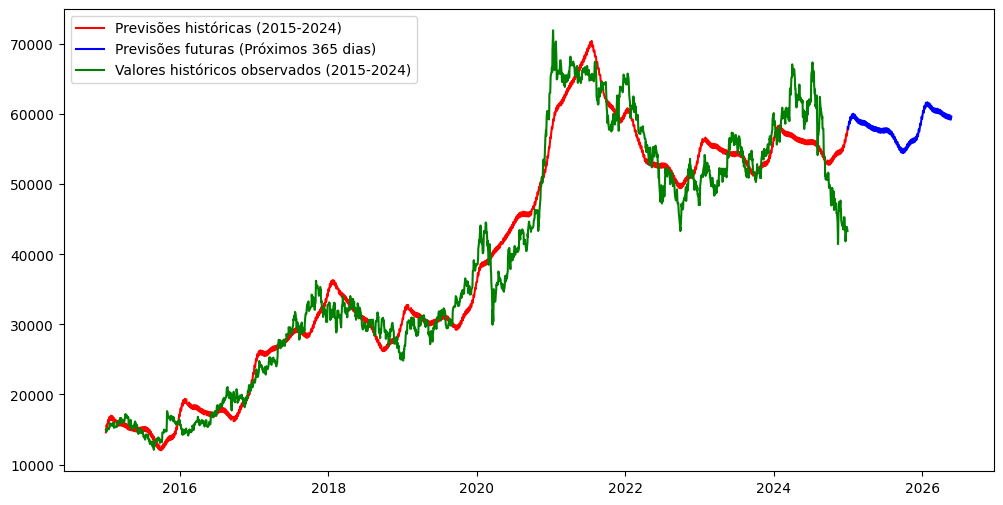

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(
    previsoes_historicas["ds"],
    previsoes_historicas["yhat1"],
    label = "Previsões históricas (2015-2024)",
    c="r",
)

plt.plot(
    previsoes_futuras["ds"],
    previsoes_futuras["yhat1"],
    label = "Previsões futuras (Próximos 365 dias)",
    c="b",
)
plt.plot(dados["ds"],dados["y"], label = "Valores históricos observados (2015-2024)", c="g")
plt.legend()
plt.show()

# Avaliando o modelo

In [ ]:
#Melhor medida para o modelo
r2_score(y_true=previsoes_historicas["y"],y_pred=previsoes_historicas["yhat1"])

0.9582394932090513

In [ ]:
mean_absolute_error(y_true=previsoes_historicas["y"],y_pred=previsoes_historicas["yhat1"])

2612.342745990326

In [ ]:
mean_absolute_percentage_error(y_true=previsoes_historicas["y"],y_pred=previsoes_historicas["yhat1"])


0.07120900846800066